In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv("Activity_Data.csv")
data.shape

(7352, 563)

In [9]:
data.dtypes.value_counts()

float64    561
int64        1
object       1
Name: count, dtype: int64

In [10]:
# As I see I have 563 col, and 561 of them is calculation of activity ['float64']
# So 2 of them are ['subject', 'Activity']
name_of_ = data.select_dtypes(include=['int64', 'object']).columns.tolist()
name_of_

['subject', 'Activity']

In [11]:
# Missing data
colomns_with_missing_data = data.columns[data.isnull().any()]
colomns_with_missing_data

Index([], dtype='object')

In [12]:
# Target
y = data['Activity']
y.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

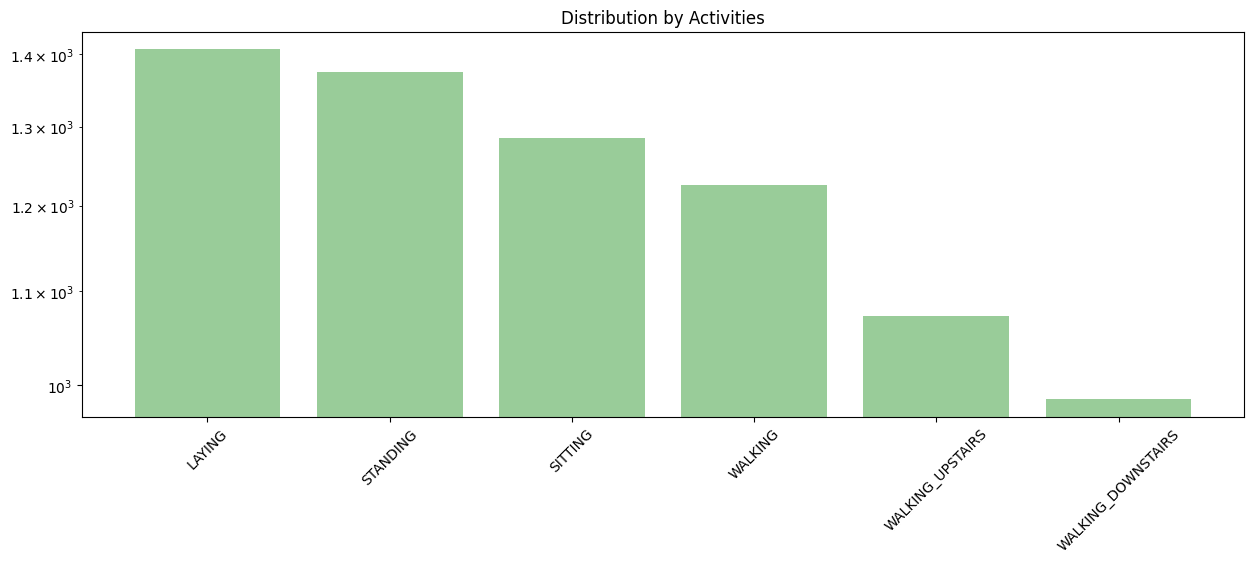

In [13]:
# data destribution
label_counts = y.value_counts()
plt.figure(figsize=(15, 5))
plt.bar(label_counts.index, label_counts, color='green', width=0.8, alpha=0.4)
plt.xticks(rotation=45)
plt.title('Distribution by Activities')
# big dataset, and to see the difference I'll scale
plt.yscale('log')


In [14]:
# work with predictor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X=data.drop(['subject', 'Activity'],axis=1)

scaler = StandardScaler()
X=scaler.fit_transform(X)

pca=PCA(n_components=0.9)
X=pca.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# to tune my models for SVM and KNN
KNN_grid_param = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance']
}
svm_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10]
}


In [16]:
k_grid=GridSearchCV(KNeighborsClassifier(),param_grid=KNN_grid_param,cv=5)
svm_grid=GridSearchCV(SVC(),param_grid=svm_param_grid,cv=5)
k_grid.fit(X_train,y_train)
svm_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [17]:
K_best_param, K_best_estim = k_grid.best_params_, k_grid.best_estimator_
smv_best_param, svm_best_estim = svm_grid.best_params_, svm_grid.best_estimator_
print('--'*50,'\n',f'Best param for KNN{K_best_param}','\n','--'*50,'\n',f'Best param for SVM{smv_best_param}')


---------------------------------------------------------------------------------------------------- 
 Best param for KNN{'n_neighbors': 3, 'weights': 'distance'} 
 ---------------------------------------------------------------------------------------------------- 
 Best param for SVM{'C': 10, 'kernel': 'rbf'}


In [18]:
from sklearn.metrics import accuracy_score
y_pred_K=K_best_estim.predict(X_test)
y_pred_smv=svm_best_estim.predict(X_test)

K_accuracy=accuracy_score(y_pred_K,y_test)
svm_accuracy=accuracy_score(y_pred_K,y_test)

In [19]:
# ok I don't have best model so I can choose any model
print('--'*50,'\n',f'KNN accuracy{K_accuracy}','\n','--'*50,'\n',f'SVM accuracy{svm_accuracy}')

---------------------------------------------------------------------------------------------------- 
 KNN accuracy0.9496940856560163 
 ---------------------------------------------------------------------------------------------------- 
 SVM accuracy0.9496940856560163


In [38]:
from sklearn.metrics import f1_score
# There is a small chance of incorrectly classifying sitting and standing
f1_per_class = f1_score(y_test, y_pred_smv, average=None)
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred_smv)
for class_idx, f1_score_class in enumerate(f1_per_class):
    class_name = label_encoder.classes_[class_idx]
    print(f"F1-measure for class '{class_name}': {f1_score_class:.2f}")



F1-measure for class 'LAYING': 1.00
F1-measure for class 'SITTING': 0.91
F1-measure for class 'STANDING': 0.91
F1-measure for class 'WALKING': 1.00
F1-measure for class 'WALKING_DOWNSTAIRS': 0.99
F1-measure for class 'WALKING_UPSTAIRS': 1.00
